# Задача №3. "Оценки студентов по двум предметам"

### Вводная
Анализируем оценки студентов по двум разным предметам в университете, чтобы выяснить, по какому предмету студенты в среднем показывают лучшие результаты и какова общая вариативность оценок по каждому из предметов. Используя данные из файла CSV, задача состоит в вычислении основных статистических характеристик для каждого из предметов и сравнении их с помощью визуализации.

### Задача
1. Прочитать данные из файла CSV и провести их первоначальную обработку.
2. Для каждого предмета найти средний балл, медиану и моду оценок.
3. Вычислить стандартное отклонение оценок по каждому предмету.
4. Сравнить распределения оценок по двум предметам, используя гистограммы с помощью библиотеки Matplotlib.
5. Определить предмет с лучшей средней оценкой и меньшим разбросом оценок.

### Входные данные
Файл grades.csv содержит три колонки: Имя студента, Оценка по математике и Оценка по литературе.
```
Имя студента,Оценка по математике,Оценка по литературе
Анна,5,4
Борис,3,5
Виктор,4,3
Диана,5,5
Елена,2,4
```

### Выходные данные
```
Средний балл по математике: {средний_балл_математика}
Средний балл по литературе: {средний_балл_литература}
Медиана оценок по математике: {медиана_математика}, по литературе: {медиана_литература}
Стандартное отклонение оценок по математике: {стандартное_отклонение_математика}, по литературе: {стандартное_отклонение_литература}
```
**Визуализация распределений оценок.**

Средний балл по математике: 3.799999952316284
Средний балл по литературе: 4.199999809265137
Медиана оценок по математике: 4.0, по литературе: 4.0
Стандартное отклонение оценок по математике: 1.1661903858184814, по литературе: 0.7483315467834473



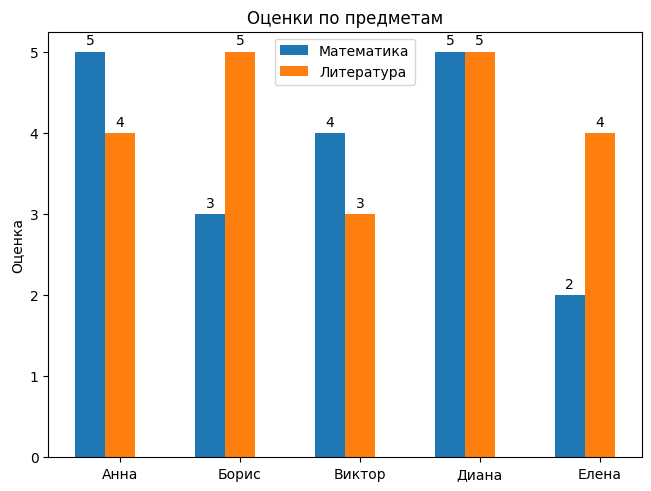

In [60]:
import csv
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt


def open_file_csv(path):
    with open(path, newline='\n', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        first_column = []
        second_column = []
        third_column = []
        for row in reader:
            first_column.append(row[0])
            second_column.append(row[1])
            third_column.append(row[2])
            
        first_column.pop(0)
        second_column.pop(0)
        third_column.pop(0)
        
        return first_column, second_column, third_column

data = open_file_csv('students_scores.csv')

students = data[0]
scores_math = np.array(data[1], dtype= np.float32)
scores_litr = np.array(data[2], dtype= np.float32)

print(f'Средний балл по математике: {np.mean(scores_math)}\n'
f'Средний балл по литературе: {np.mean(scores_litr)}\n'
f'Медиана оценок по математике: {np.median(scores_math)}, по литературе: {np.median(scores_litr)}\n'
f'Стандартное отклонение оценок по математике: {np.sqrt(np.var(scores_math))}, по литературе: {np.sqrt(np.var(scores_litr))}\n')



scores = {'Математика': scores_math,'Литература': scores_litr,}

x = np.arange(len(students))  
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Оценка')
ax.set_title('Оценки по предметам')
ax.set_xticks(x + width, students)
ax.legend(loc='best', ncols=1)


plt.show()
